## Import Libraries

In [91]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import matplotlib
matplotlib.rcParams["figure.figsize"]=(20,10)
pd.set_option('display.max_rows', 20)

## Download the Dataset

In [92]:
df_1=pd.read_csv("Bengaluru_House_Data.csv")
df_1.head(5)

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


## See the Dataframe shape 

In [93]:
df_1.shape

(13320, 9)

## Count & Show different area type

In [94]:
df_1.groupby("area_type")["area_type"].agg("count")

area_type
Built-up  Area          2418
Carpet  Area              87
Plot  Area              2025
Super built-up  Area    8790
Name: area_type, dtype: int64

## Drop some columns

In [95]:
df2=df_1.drop(["area_type","society","balcony","availability"],axis="columns")
df2.head()

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00


## Show where is the empty data

In [96]:
df2.isnull().sum()
# when you have missing values you can fill then with the mean of the column, but if you have a small case of missing values in a giant dataframe we can simply drop then


location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

## Drop Missing Values 

In [97]:
df3=df2.dropna()
df3.isnull().sum()

location      0
size          0
total_sqft    0
bath          0
price         0
dtype: int64

## Explore the new DataFrame

In [98]:
df3.shape

(13246, 5)

## Showing a problem

In [99]:
df3["size"].unique() # this command only shows 1 time the data in a specfici column
# the problem is that Bedroom = BHK, so we have 3 bedroom and 3 BHK

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

## Create a column with only BHK Values

In [100]:
df3["bhk"]=df3["size"].apply(lambda x: int(x.split(" ")[0]))
# we need to apply the function to only consider the first string index before the space, so we can have a number without the BHK

<ipython-input-100-3c86e5e2c8d4>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3["bhk"]=df3["size"].apply(lambda x: int(x.split(" ")[0]))


## Visualizing the bhk column with the values of bedrooms and BHK

In [101]:
df3

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4
2,Uttarahalli,3 BHK,1440,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00,3
4,Kothanur,2 BHK,1200,2.0,51.00,2
...,...,...,...,...,...,...
13315,Whitefield,5 Bedroom,3453,4.0,231.00,5
13316,Richards Town,4 BHK,3600,5.0,400.00,4
13317,Raja Rajeshwari Nagar,2 BHK,1141,2.0,60.00,2
13318,Padmanabhanagar,4 BHK,4689,4.0,488.00,4


## Visualizing Mansions hahahah

In [102]:
df3[df3["bhk"]>20]
# ??? 2400 m^2 and 43 meters? something wrong with this value

,location,size,total_sqft,bath,price,bhk
1718,2Electronic City Phase II,27 BHK,8000,27.0,230.0,27
4684,Munnekollal,43 Bedroom,2400,40.0,660.0,43


## Total Square Root Feet Explore

In [103]:
df3["total_sqft"].unique()
# some data are "in range" not in value

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

## Remove Ranged Values

In [104]:
def is_float(x):
    try: # in this case the data in total_sqft is correct
        float(x)
    except: #in this case the data in total_sqft is ranged
        return False
    return True
        

In [105]:
df3[~df3["total_sqft"].apply(is_float)].head(10) # in that case with "~" i get the negative values in total_sqft, so cool
# we have ranged values, perch values, and Sq Meter values

,location,size,total_sqft,bath,price,bhk
30,Yelahanka,4 BHK,2100 - 2850,4.0,186.000,4
122,Hebbal,4 BHK,3067 - 8156,4.0,477.000,4
137,8th Phase JP Nagar,2 BHK,1042 - 1105,2.0,54.005,2
165,Sarjapur,2 BHK,1145 - 1340,2.0,43.490,2
188,KR Puram,2 BHK,1015 - 1540,2.0,56.800,2
410,Kengeri,1 BHK,34.46Sq. Meter,1.0,18.500,1
549,Hennur Road,2 BHK,1195 - 1440,2.0,63.770,2
648,Arekere,9 Bedroom,4125Perch,9.0,265.000,9
661,Yelahanka,2 BHK,1120 - 1145,2.0,48.130,2
672,Bettahalsoor,4 Bedroom,3090 - 5002,4.0,445.000,4


## Convert ranged values into mean ranged values

In [106]:
def convert_sqft_to_num(x):
    tokens=x.split("-")
    if len(tokens)==2: # se tem um número antes e um depois
        return (float(tokens[0])+float(tokens[1]))/2
    try:
        return float(x) # after convert we are converting this value to float
    except:
        return None # the case of perch and sqft meter
    

In [107]:
df4=df3.copy()
df4["total_sqft"]=df4["total_sqft"].apply(convert_sqft_to_num)
df4.head(10)

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3
4,Kothanur,2 BHK,1200.0,2.0,51.00,2
5,Whitefield,2 BHK,1170.0,2.0,38.00,2
6,Old Airport Road,4 BHK,2732.0,4.0,204.00,4
7,Rajaji Nagar,4 BHK,3300.0,4.0,600.00,4
8,Marathahalli,3 BHK,1310.0,3.0,63.25,3
9,Gandhi Bazar,6 Bedroom,1020.0,6.0,370.00,6


In [108]:
df4.loc[648]# missing value because this one is a perch value, so i am cleaning it

location        Arekere
size          9 Bedroom
total_sqft          NaN
bath                9.0
price             265.0
bhk                   9
Name: 648, dtype: object

## Now our dataset is cleaned

## Outlier Detection

In [109]:
df5 = df4.copy()
df5["price_per_sqft"]=df5["price"]*100000/df5["total_sqft"] # the price is reduced...
df5.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000


## Filter By Location

In [110]:
df5["location"].unique() 

array(['Electronic City Phase II', 'Chikka Tirupathi', 'Uttarahalli', ...,
       '12th cross srinivas nagar banshankari 3rd stage',
       'Havanur extension', 'Abshot Layout'], dtype=object)

In [111]:
len(df5["location"].unique() ) # ok we have a lot of different locations...

1304

In [112]:
df5["location"]=df5["location"].apply(lambda x: x.strip())
location_stats=df5.groupby("location")["location"].agg("count").sort_values(ascending=True) # good code to sort values
location_stats

location
1 Annasandrapalya      1
Kudlu Village,         1
Kumbhena Agrahara      1
Kuvempu Layout         1
LIC Colony             1
                    ... 
Thanisandra          236
Kanakpura Road       266
Electronic City      304
Sarjapur  Road       392
Whitefield           535
Name: location, Length: 1293, dtype: int64

## How many locations have less than 10 datapoints

In [113]:
len(location_stats[location_stats<=10])

1052

In [114]:
location_stats_less_10=location_stats[location_stats<=10]
location_stats_less_10.sort_values(ascending=False)

location
BTM 1st Stage            10
Nagappa Reddy Layout     10
1st Block Koramangala    10
Dodsworth Layout         10
Dairy Circle             10
                         ..
Sector 3 HSR Layout       1
Richmond Road             1
Ring Road Nagarbhavi      1
Rukmaiah Layout           1
1 Annasandrapalya         1
Name: location, Length: 1052, dtype: int64

## How many unique locations

In [115]:
len(df5["location"].unique() )

1293

## let's concatenate the irrelevant locations into a class of locations 

In [116]:
df5["location"]=df5["location"].apply(lambda x: "other" if x in location_stats_less_10 else x)
len(df5["location"].unique())

242

## Now some data engineering is done!

## Let's remove the outliers

In [117]:
# outliers: 
df5[df5["total_sqft"]/df5["bhk"]<300].head(5)

# this 300 value is personal, we need to classify which values is strange by certain metric, in this cae the sqft per bedroom

,location,size,total_sqft,bath,price,bhk,price_per_sqft
9,other,6 Bedroom,1020.0,6.0,370.0,6,36274.509804
45,HSR Layout,8 Bedroom,600.0,9.0,200.0,8,33333.333333
58,Murugeshpalya,6 Bedroom,1407.0,4.0,150.0,6,10660.980810
68,Devarachikkanahalli,8 Bedroom,1350.0,7.0,85.0,8,6296.296296
70,other,3 Bedroom,500.0,3.0,100.0,3,20000.000000


In [118]:
df5.shape

(13246, 7)

In [124]:
df6=df5[~(df5["total_sqft"]/df5["bhk"]<300)]
df6
# the best way to remove certain condition into a dataframe, using the "~"

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000
...,...,...,...,...,...,...,...
13315,Whitefield,5 Bedroom,3453.0,4.0,231.00,5,6689.834926
13316,other,4 BHK,3600.0,5.0,400.00,4,11111.111111
13317,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,60.00,2,5258.545136
13318,Padmanabhanagar,4 BHK,4689.0,4.0,488.00,4,10407.336319


In [125]:
df6.shape # the conclusion is that we have removed a lot of values

(12502, 7)

## Let's check another data (price per sqft)

In [126]:
df6["price_per_sqft"].describe()

count     12456.000000
mean       6308.502826
std        4168.127339
min         267.829813
25%        4210.526316
50%        5294.117647
75%        6916.666667
max      176470.588235
Name: price_per_sqft, dtype: float64

## let's create a function to remove this extreme values by standard deviation (assuming normal distribuition)

In [127]:
# we need to find the std per location
def remove_pps_outliers(df):
    df_out=pd.DataFrame()
    for key , subdf in df.groupby("location"):# repetitions by locations (unique because the groupby method)
        m=np.mean(subdf["price_per_sqft"]) # mean of that location
        st=np.std(subdf["price_per_sqft"]) # std of that location
        reduced_df = subdf[(subdf["price_per_sqft"]>(m-st))&(subdf["price_per_sqft"]<=(m+st))] # dataframe inside 1 std
        df_out=pd.concat([df_out,reduced_df],ignore_index=True) # concat the dataframe created with the value that the function above accepts
    return df_out

In [132]:
df7=remove_pps_outliers(df6)
df7.shape # i have removed the outliers by 1 std

(10241, 7)

## Some houses in the same locations with less bedrooms are more expensive than houses with more bedrooms

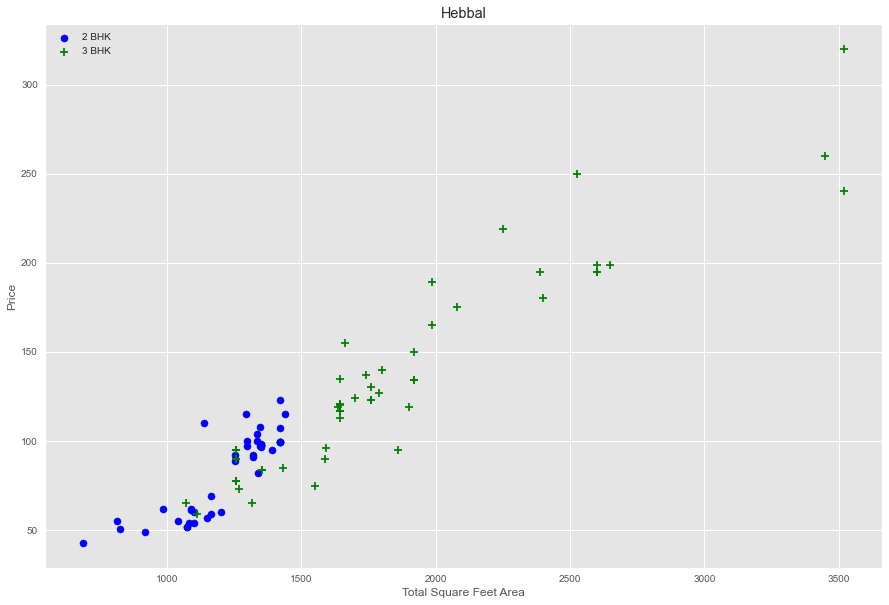

In [171]:
plt.style.use("ggplot")
def plot_scatter_chart(df,location):
    bhk2=df[(df["location"]==location)& (df["bhk"]==2)]
    bhk3=df[(df["location"]==location)& (df["bhk"]==3)]
    matplotlib.rcParams["figure.figsize"]=(15,10)
    plt.scatter(bhk2["total_sqft"],bhk2["price"],color="blue",label="2 BHK",s=50)
    plt.scatter(bhk3["total_sqft"],bhk3["price"],color="green",marker="+",label="3 BHK",s=50)
    plt.xlabel("Total Square Feet Area")
    plt.ylabel("Price")
    plt.title(location)
    plt.legend()
plot_scatter_chart(df7,"Hebbal") # example

In [140]:
def remove_bhk_outliers(df):
    exclude_indices=np.array([])
    for location , location_df in df.groupby("location"):
        bhk_stats={}
        for bhk, bhk_df in location_df.groupby("bhk"):
            bhk_stats[bhk]={
                "mean": np.mean(bhk_df["price_per_sqft"]),
                "std": np.std(bhk_df["price_per_sqft"]),
                "count": bhk_df.shape[0]
            }
        for bhk, bhk_df in location_df.groupby("bhk"):
            stats=bhk_stats.get(bhk-1)
            if stats and stats["count"]>5:
                exclude_indices=np.append(exclude_indices,bhk_df[bhk_df["price_per_sqft"]<(stats["mean"])].index.values)
    return df.drop(exclude_indices,axis="index")
df8=remove_bhk_outliers(df7)
df8.shape

(7329, 7)

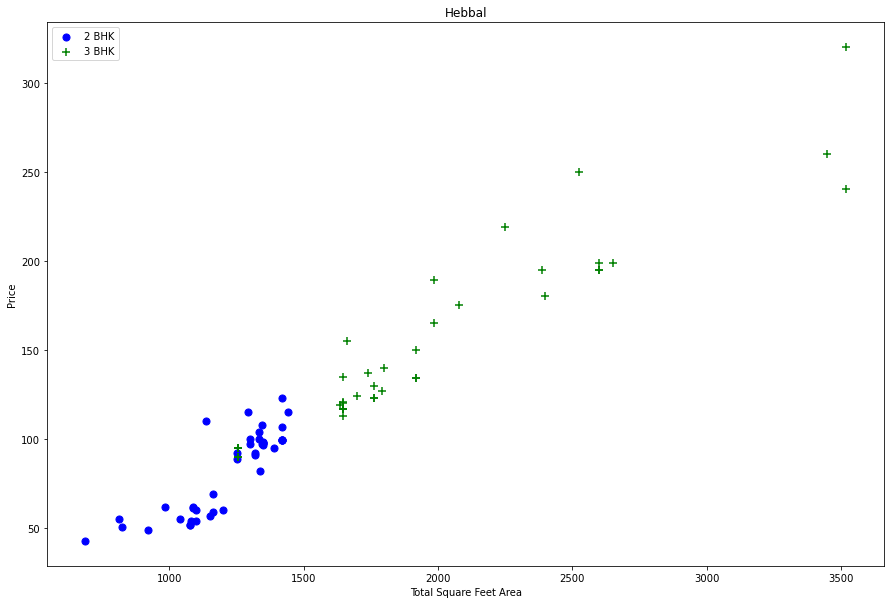

In [141]:
plot_scatter_chart(df8,"Hebbal") # example

## Plot Price per square feet

Text(0, 0.5, 'Count')

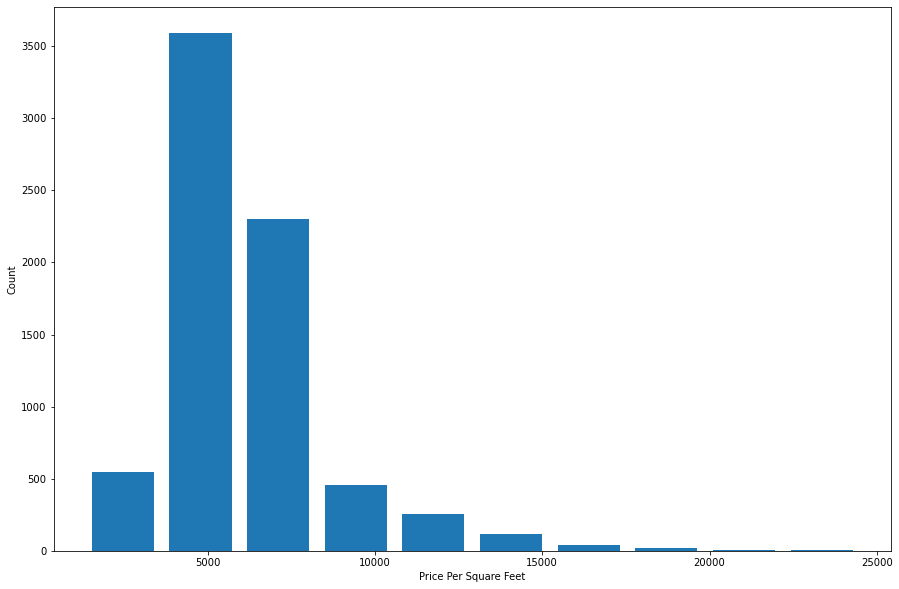

In [142]:
plt.hist(df8["price_per_sqft"],rwidth=0.8)
plt.xlabel("Price Per Square Feet")
plt.ylabel("Count")

## Exploring the bathrooms

In [143]:
df8["bath"].unique()

array([ 4.,  3.,  2.,  5.,  8.,  1.,  6.,  7.,  9., 12., 16., 13.])

In [144]:
df8[df8["bath"]>10] # more than 10 bathrooms in a house?

,location,size,total_sqft,bath,price,bhk,price_per_sqft
5277,Neeladri Nagar,10 BHK,4000.0,12.0,160.0,10,4000.000000
8486,other,10 BHK,12000.0,12.0,525.0,10,4375.000000
8575,other,16 BHK,10000.0,16.0,550.0,16,5500.000000
9308,other,11 BHK,6000.0,12.0,150.0,11,2500.000000
9639,other,13 BHK,5425.0,13.0,275.0,13,5069.124424


## Let's remove the case if there is more bathrooms than bedrooms

Text(0, 0.5, 'Count')

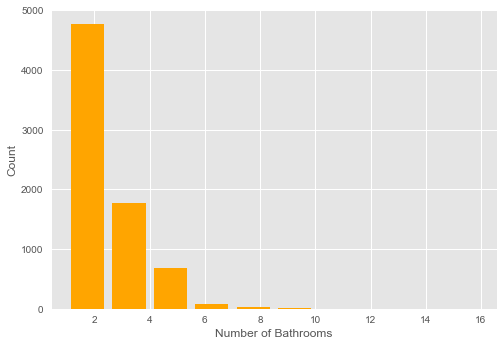

In [165]:
plt.style.use("ggplot")
plt.hist(df8["bath"],rwidth=0.8,color="orange")
plt.xlabel("Number of Bathrooms")
plt.ylabel("Count")

# Setting the Outlier

In [157]:
df8[df8["bhk"]+2<=df8["bath"]]
# if the bedrooms +2 is < total bathrooms than its a outlier 

,location,size,total_sqft,bath,price,bhk,price_per_sqft
36,2nd Stage Nagarbhavi,6 Bedroom,3000.0,8.0,451.0,6,15033.333333
37,2nd Stage Nagarbhavi,6 Bedroom,2400.0,8.0,450.0,6,18750.000000
530,Arekere,4 BHK,2710.0,6.0,142.0,4,5239.852399
580,BTM 2nd Stage,3 Bedroom,1260.0,5.0,185.0,3,14682.539683
813,Bannerghatta,4 BHK,3012.0,6.0,250.0,4,8300.132802
...,...,...,...,...,...,...,...
9915,other,4 BHK,6652.0,6.0,510.0,4,7666.867108
10036,other,2 BHK,600.0,4.0,70.0,2,11666.666667
10089,other,3 Bedroom,5656.0,5.0,499.0,3,8822.489392
10202,other,4 BHK,6652.0,6.0,660.0,4,9921.828022


# Drop the outliers

In [160]:
df9=df8[df8["bhk"]+2>df8["bath"]]
df9

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,1st Block Jayanagar,4 BHK,2850.0,4.0,428.0,4,15017.543860
1,1st Block Jayanagar,3 BHK,1630.0,3.0,194.0,3,11901.840491
2,1st Block Jayanagar,3 BHK,1875.0,2.0,235.0,3,12533.333333
3,1st Block Jayanagar,3 BHK,1200.0,2.0,130.0,3,10833.333333
4,1st Block Jayanagar,2 BHK,1235.0,2.0,148.0,2,11983.805668
...,...,...,...,...,...,...,...
10232,other,2 BHK,1200.0,2.0,70.0,2,5833.333333
10233,other,1 BHK,1800.0,1.0,200.0,1,11111.111111
10236,other,2 BHK,1353.0,2.0,110.0,2,8130.081301
10237,other,1 Bedroom,812.0,1.0,26.0,1,3201.970443


## Now we can start our model

In [161]:
df10=df9.drop(["size","price_per_sqft"],axis="columns")
df10.head(3)

,location,total_sqft,bath,price,bhk
0,1st Block Jayanagar,2850.0,4.0,428.0,4
1,1st Block Jayanagar,1630.0,3.0,194.0,3
2,1st Block Jayanagar,1875.0,2.0,235.0,3


## Create Dummies

In [167]:
dummies=pd.get_dummies(df10["location"]) # good method
dummies.head(3)

,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Concatenate dataframe and dummies

In [168]:
df11=pd.concat([df10,dummies.drop("other",axis="columns")],axis="columns")
df11.head(3)

,location,total_sqft,bath,price,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,1st Block Jayanagar,2850.0,4.0,428.0,4,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1st Block Jayanagar,1630.0,3.0,194.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1st Block Jayanagar,1875.0,2.0,235.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## I can drop location because I have Dummies

In [170]:
df12=df11.drop("location",axis="columns")
df12.head(3)

,total_sqft,bath,price,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.0,4.0,428.0,4,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1630.0,3.0,194.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1875.0,2.0,235.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [172]:
df12.shape

(7251, 245)

## X Values (Independent Variables)

In [173]:
X=df12.drop("price",axis="columns") # price is my Y
X.head(3)

,total_sqft,bath,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.0,4.0,4,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1630.0,3.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1875.0,2.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [175]:
y=df12["price"]
y.head()

0    428.0
1    194.0
2    235.0
3    130.0
4    148.0
Name: price, dtype: float64

# Machine Learning Start

In [176]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=10)

In [178]:
from sklearn.linear_model import LinearRegression
lr_clf=LinearRegression()
lr_clf.fit(X_train,y_train)
lr_clf.score(X_test,y_test)
# the value below is R^2

0.845227769787428

## Let's use cross validation

In [179]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score
cv=ShuffleSplit(n_splits=5,test_size=0.2,random_state=0)
cross_val_score(LinearRegression(),X,y,cv=cv) # need to study cross validation


array([0.82430186, 0.77166234, 0.85089567, 0.80837764, 0.83653286])

## Test different methods with one command

In [185]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor
def find_best_model_using_gridsearch(X,y):
    algos={
        "linear_regression": {
            "model": LinearRegression(),
            "params": {
                "normalize": [True,False]
            }
        },
        "lasso":{
            "model": Lasso(),
            "params": {
                "alpha": [1,2],
                "selection": ["random","cyclic"]
            }
        },
        "decision_tree":{
            "model": DecisionTreeRegressor(),
            "params":{
                "criterion": ["mse","friedman_mse"],
                "splitter": ["best","random"]
            }
        }
    }
    scores=[]
    cv=ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
    for algo_name, config in algos.items():
        gs=GridSearchCV(config["model"],config["params"],cv=cv,return_train_score=False)
        gs.fit(X,y)
        scores.append({
            "model": algo_name,
            "best_score": gs.best_score_,
            "best_params": gs.best_params_
        })
    return pd.DataFrame(scores,columns=["model","best_score","best_params"])
find_best_model_using_gridsearch(X,y)

,model,best_score,best_params
0,linear_regression,0.818354,{'normalize': False}
1,lasso,0.687433,"{'alpha': 1, 'selection': 'random'}"
2,decision_tree,0.718847,"{'criterion': 'friedman_mse', 'splitter': 'best'}"


In [ ]:
# linear regression is the best one

# Using the best fit model

In [191]:
def predict_price(location,sqft,bath,bhk):
    loc_index=np.where(X.columns==location)[0][0]
    
    x=np.zeros(len(X.columns))
    x[0]=sqft
    x[1]=bath
    x[2]=bhk
    if loc_index>=0:
        x[loc_index]=1
    return lr_clf.predict([x])[0]

## Predict Price

In [192]:
predict_price("1st Phase JP Nagar",1000,2,2)

83.49904677167734